<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>
# <center>K-Vecinos Más Cercanos</center>

En este lab, cargarás un conjunto de datos de un cliente, adaptarás la información y utilizarás el algoritmo de k-vecinos más cercanos para predecir un punto de datos. ¿Qué es **K-Vecinos Más Cerca**?

**Vecinos K Más Cercanos** es un algoritmo para aprendizaje supervisado. Donde los datos se entrenana con puntos de datos que corresponden a su clasificación. Como un punto se predice, toma en cuenta los puntos 'K' más cercanos para determinar su clasificación

### Aquí hay una forma de ver el algoritmo de los K vecinos más cercanos.

<img src = "https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

En este caso, tenemos puntos de datos de Clase A y B. Deseamos predecir dónde está la estrella (punto de datos de prueba). Si consideramos un valor k de 3 (3 el punto más cercano) obtendremos una predicción de Clase B. Sin embargo, si consideramos un valor k de 6, obtendremos una predicción de Clase A.

En este sentido, es importante considerar el valor de k. Mirando al diagrama, deberías deducir lo que es realmente un algormitmo de K Vecinos más cercanos. Tiene en cuenta los vecinos 'K' más cercano (puntos) cuando predice la clasificación de los puntos de prueba.

Carguemos las librerías necesarias

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Acerca del set de datos

Imagina un proveedor de telecomunicaciones que ha segmentado la base de sus clientes por servicio, categorizando a los clientes en cuatro grupos. Si los datos demográficos se pueden usar para predecir la pertenencia de grupo del envío, la compañía podría personalizar las ofertas para los prospectos. Es un problema de clasificación. O sea, dado un set de datos, con etiquetas predefinidas, necesitaremos construir un modelo para predecir la clase de un nuevo o desconocido caso. 

Este ejemplo hace foco en datos demográficos, sean region, edad, estado civil, para predecir patrones de uso. 

El campo objetivo (target), llamado __custcat__, tiene cuatro valores posibles que corresponden a los cuatro grupos de clientes, a saber:
  1- Servicio Básico
  2- E-Servicio
  3- Servicio Plus
  4- Servicio Total

Nuestro objetivo es construir un clasificador para predecir la clase de casos desconocidos. Utilizaremos un tipo específico de clasificación llamado K vecino más cercano.


Descarguemos el set de datos. Para descargar los datos, utilizaremos !wget desde IBM Object Storage.

In [2]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2021-05-02 22:51:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0s      

2021-05-02 22:51:54 (241 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



__¿Sabías?__ Cuando se trata de Machine Learning, seguro trabajarás con grandes datasets (juego de datos). Entonces, ¿dónde podrás guardar esos datos? IBM ofrece una oportunidad única para las empresas, con 10 Tb de IBM Cloud Object Storage: [Registrate ahora gratuitamente](http://cocl.us/ML0101EN-IBM-Offer-CC)

### Cargar Datos a partir de un archivo CSV (Valores Delimitados por Coma)  

In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Visualización de Datos y Análisis 



#### Veamos cuántos de cada clase están en nuestro set de datos 

In [4]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


Puedes explorar fácilmente tus datos utilizando técnicas de visualización:

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

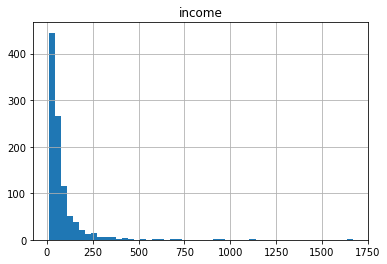

In [5]:
df.hist(column='income', bins=50)

### Feature set

Definamos feature sets, X:

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Para utilizar la librería scikit-learn, tenemos que convertir el data frame de Panda en un Numpy array:

In [7]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

¿Cuáles son nuestras etiquetas?

In [8]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## Normalizar los Datos 

La estandarización de Datos brinda a los datos cero media y varianza de unidad, es buena práctica, especialmente para algoritmos tales como KNN el cual se basa en distancia de casos:

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

### Train Test Split  
Al margen de la exactitud de la muestra, está el porcentaje de las predicciones correctas que el modelo hace de los datos para el que no ha sido entrenado. Al hacer un entrenamiento y prueba en el mismo set de datos, de seguro tendrán baja exactitud de muestra debido a la probabilidad de estar sobre dimensionado.

Es importante que nuestros modelos tengan una exactitud de muestra alta porque el propósito de cualquier modelos es lograr predicciones lo más certeras posibles sobre datos no conocidos. Entonces, ¿cómo podemos mejorar la precisión? Una forma es utilizar un enfoque de evaluación llamado Train/Test Split (Entrenar/Evaluar Dividir).
Esta forma requiere dividir el set de datos en conjuntos de entrenamiento y prueba, los cuales son mutuamente exclusivos. Luego de ello, se entrena con el conjunto de entrenamiento y se prueba con el conjunto de prueba.

Este método brinda una evaluación más precisa porque el set de prueba no es parte del conjunto de datos que ha sido utilizado para entrenar los datos. Es más realista para los problemas actuales.


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

Set de Entrenamiento: (800, 11) (800,)
Set de Prueba: (200, 11) (200,)


# Clasificación 

## K-vecinos más cercano (K-NN)

#### Importar librería 

Clasificador que implementa k-vecinos más cercanos.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

### Entrenamiento

Comencemos con el algoritmo con k=4 por ahora:

In [11]:
k = 4
#Entrenar el Modelo y Predecir  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

### Predicción
podemos utilizar el modelo para predecir el set de prueba:

In [12]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 3, 4, 4])

### Evaluación de certeza
En clasificación multietiqueta, la función __classification accuracy score__ computa la certeza del subconjunto. Esta función es igual a la función jaccard_similarity_score. Básicamente, calcula cómo se relacionan las etiquetas actuales con las etiquetas predichas dentro del set de pruebas.

In [13]:
from sklearn import metrics
print("Entrenar el set de Certeza: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Probar el set de Certeza: ", metrics.accuracy_score(y_test, yhat))

Entrenar el set de Certeza:  0.55625
Probar el set de Certeza:  0.26


## Práctica
¿Puedes construir el modelo nuevamente, pero esta vez con k=6?

In [14]:
# escribe tu código aquí
    
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Certeza del Set de Entrenamiento: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Certeza del Set de Prueba: ", metrics.accuracy_score(y_test, yhat6))




Certeza del Set de Entrenamiento:  0.495
Certeza del Set de Prueba:  0.295


Haz doble click __aquí__ para la solución.

<!-- Tu respuesta debajo:
    
    
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Certeza del Set de Entrenamiento: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Certeza del Set de Prueba: ", metrics.accuracy_score(y_test, yhat6))

-->

#### ¿Qué paso con otro K?
K en KNN, es el número de los vecinos más cercanos para examinar. Se supone que el Usuario lo indique. Por lo tanto, ¿cómo elegimos el correcto K?
La solución general es reservar una parte de los datos para probaar la certeza del modelo. Luego, elegimos k =1, lo utilizamos como parte del entrenamiento para modelar, y calculamos la certeza de la predicción utilizando todas las muestras del set de pruebas. Repetir este proceso, aumentando el k, y viendo luego, cual es el mejor k para el modelo.

Podemos calcular la certeza de KNN para diferentes Ks.

In [15]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Entrenar el Modelo y Predecir  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.295, 0.35 , 0.33 , 0.32 ])

#### Dibujo de la certeza del modelo para diferentes números de vecinos

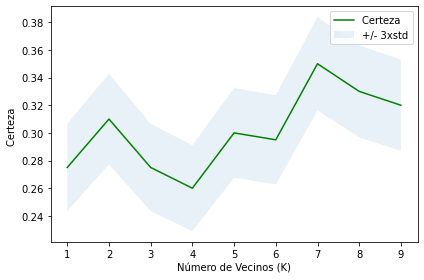

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Certeza ', '+/- 3xstd'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "La mejor aproximación de certeza fue con ", mean_acc.max(), "con k=", mean_acc.argmax()+1) 

## Want to learn more?

IBM SPSS Modeler es una plataforma para analytics que contiene varios algoritmos de machine learning. Fue diseñada para acercar inteligencia predictiva a las decisiones hechas por individuos, grupos, sistemas, toda la empresa. Un free trial está disponible en: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Asi mismo, puedes utilizar Watson Studio para ejecutar estos notebooks más rápido y con datasets más grandes. Watson Studio es una solución en la nube lider de IBM's para científicos de datos, construída por científicos de datos. Con Jupyter notebooks, RStudio, Apache Spark y librerías conocidas pre instaladas en la nube, Watson Studio posibilita a los científicos de datos colaborar en sus proyectos sin tener que instalar nada. Sumate a la comunidad de usuarios Watson Studio hoy mismo por medio de una cuenta gratuita en [Watson Studio](https://cocl.us/ML0101EN_DSX)

### ¡Gracias por completar esta lección!

Notebook creado por: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). Este lab y su código fuente están registrados bajo los términos de [MIT License](https://bigdatauniversity.com/mit-license/).​